# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Seprianto Sianipar
- **Email:** raysianipar15@gmail.com
- **ID Dicoding:** seprianto15

## Menentukan Pertanyaan Bisnis

- Berapakah rata-rata waktu pengiriman yang dibutuhkan untuk pengiriman produk?
- Berapa banyak pesanan tiba secara tepat waktu dan berapa banyak pesanan mengalami keterlambatan?
- Kota manakah yang pesanannya paling banyak tiba secara 'On Time'?
- Kota manakah yang pesanannya paling banyak tiba secara 'Delay'?
- Metode pembayaran apa yang sering digunakan pelanggan?
- Product apa yang paling banyak dan paling sedikit dipesan?
- Product apa yang memiliki harga tertinggi dan terendah?
- Bagaimana performa penjualan dan revenue dalam beberapa tahun terakhir?

## Import Semua Packages/Library yang Digunakan

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium

## Data Wrangling

### Gathering Data


In [7]:
# Load data customer

customer_df = pd.read_csv('https://raw.githubusercontent.com/seprianto15/submission_analyst_data/master/data/customers_dataset.csv')
customer_df.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
# Load data geolocation

geolocation_df = pd.read_csv('https://raw.githubusercontent.com/seprianto15/submission_analyst_data/refs/heads/master/data/geolocation_dataset.csv')
geolocation_df.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
# Load data order_items

order_items_df = pd.read_csv('https://raw.githubusercontent.com/seprianto15/submission_analyst_data/master/data/order_items_dataset.csv')
order_items_df.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
# Load data order_payments

order_payments_df = pd.read_csv('https://raw.githubusercontent.com/seprianto15/submission_analyst_data/master/data/order_payments_dataset.csv')
order_payments_df.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
# Load data order_reviews

order_reviews_df = pd.read_csv('https://raw.githubusercontent.com/seprianto15/submission_analyst_data/master/data/order_reviews_dataset.csv')
order_reviews_df.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
# Load data orders

orders_df = pd.read_csv('https://raw.githubusercontent.com/seprianto15/submission_analyst_data/master/data/orders_dataset.csv')
orders_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
# Load data product_category_name_translation

product_category_name_df = pd.read_csv('https://raw.githubusercontent.com/seprianto15/submission_analyst_data/master/data/product_category_name_translation.csv')
product_category_name_df.head(5)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
# Load data products

products_df = pd.read_csv('https://raw.githubusercontent.com/seprianto15/submission_analyst_data/master/data/products_dataset.csv')
products_df.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
# Load data sellers

sellers_df = pd.read_csv('https://raw.githubusercontent.com/seprianto15/submission_analyst_data/master/data/sellers_dataset.csv')
sellers_df.head(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Pada gathering data akan load sebanyak 9 tabel data antara lain, load data customer, load data geolocation, load data order_items, load data order_payments, load data order_reviews, load data orders, load data product_category_name_translation, load data products dan load data sellers.  
- Hanya menampilkan 5 baris pertama dari setiap load tabel data.


### Assessing Data

#### Assessing data customer_df

In [ ]:
# Tinjau jumlah baris, kolom dan jenis data dalam data customer_df

customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
# Tinjau duplikasi data dalam data customer_df

print('Jumlah duplikasi:', customer_df.duplicated().sum())

Jumlah duplikasi: 0


In [ ]:
# Tinjau statistik deskriptif dalam data customer_df

customer_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Assessing data geolocation_df

In [ ]:
# Tinjau jumlah baris, kolom dan jenis data dalam data geolocation_df

geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [ ]:
# Tinjau duplikasi data dalam data geolocation_df

print('Jumlah duplikasi:', geolocation_df.duplicated().sum())

Jumlah duplikasi: 261831


In [ ]:
# Tinjau statistik deskriptif dalam data geolocation_df

geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


#### Assessing data order_items_df

In [ ]:
# Tinjau jumlah baris, kolom dan jenis data dalam data order_items_df

order_items_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
# Tinjau duplikasi data dalam data order_items_df

print('Jumlah duplikasi:', order_items_df.duplicated().sum())


Jumlah duplikasi: 0


In [ ]:
# Tinjau statistik deskriptif dalam data order_items_df

order_items_df.describe()


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### Assessing data order_payments_df

In [ ]:
# Tinjau jumlah baris, kolom dan jenis data dalam data order_payments_df

order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
# Tinjau duplikasi data dalam data order_payments_df

print('Jumlah duplikasi:', order_payments_df.duplicated().sum())

Jumlah duplikasi: 0


In [ ]:
# Tinjau statistik deskriptif dalam data order_payments_df

order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### Assessing data order_reviews_df

In [ ]:
# Tinjau jumlah baris, kolom dan jenis data dalam data order_reviews_df

order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
# Tinjau jumlah missing value dari setiap kolom dalam data order_reviews_df

order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [ ]:
# Tinjau duplikasi data dalam data order_reviews_df

print('Jumlah duplikasi:', order_reviews_df.duplicated().sum())

Jumlah duplikasi: 0


In [ ]:
# Tinjau statistik deskriptif dalam data order_reviews_df

order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### Assesing data orders_df

In [ ]:
# Tinjau jumlah baris, kolom dan jenis data dalam data orders_df

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
# Tinjau jumlah missing value dari setiap kolom dalam data orders_df

orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [ ]:
# Tinjau duplikasi data dalam data orders_df

print('Jumlah duplikasi:', orders_df.duplicated().sum())

Jumlah duplikasi: 0


In [ ]:
# Tinjau statistik deskriptif dalam data orders_df

orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Assessing data product_category_name_df

In [ ]:
# Tinjau jumlah baris, kolom dan jenis data dalam data product_category_name_df

product_category_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [ ]:
# Tinjau duplikasi data dalam data product_category_name_df

print('Jumlah duplikasi:', product_category_name_df.duplicated().sum())

Jumlah duplikasi: 0


In [ ]:
# Tinjau statistik deskriptif dalam data product_category_name_df

product_category_name_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


#### Assessing data products_df

In [ ]:
# Tinjau jumlah baris, kolom dan jenis data dalam data products_df

products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
# Tinjau jumlah missing value dari setiap kolom dalam data products_df

products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [ ]:
# Tinjau duplikasi data dalam data products_df

print('Jumlah duplikasi:', products_df.duplicated().sum())

Jumlah duplikasi: 0


In [ ]:
# Tinjau statistik deskriptif dalam data products_df

products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### Assessing data sellers_df

In [ ]:
# Tinjau jumlah baris, kolom dan jenis data dalam data sellers_df

sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
# Tinjau duplikasi data dalam data sellers_df

print('Jumlah duplikasi:', sellers_df.duplicated().sum())

Jumlah duplikasi: 0


In [ ]:
# Tinjau statistik deskriptif dalam data sellers_df

sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
- Pada assessing data customer_df : Tidak terdapat missing value,  duplikasi, inaccurate value dan tidak ada masalah pada tipe data
- Pada assessing data geolocation_df : Tipe data sudah sesuai, tidak terdapat missing value dan inaccurate value namun ada duplikasi pada data sebanyak 261831.
- Pada assessing data order_items_df : Tidak terdapat missing value, duplikasi dan inaccurate value namun ada kesalahan tipe data untuk kolom shipping_limit_date
- Pada assessing data_order_payments_df : Tipe data sudah sesuai, tidak terdapat missing value, duplikasi dan inaccurate value.
- Pada assesing data order_reviews_df : Tidak terdapat duplikasi dan inaccurate value. Terdapat missing value pada kolom review_comment_title dan review_comment_message. Terdapat kesalahan tipe data pada kolom review_creation_date dan review_answer_timestamp
- Pada assesing data orders_df : Tidak terdapat duplikasi dan inaccurate value. Terdapat missing value pada untuk kolom order_approved_at, order_delivered_carrier_date dan order_delivered_customer_date. Terdapat kesalahan tipe data untuk kolom order_purchase_timestamp, order_approved_at order_delivered_carrier_date, order_delivered_customer_date dan order_estimated_delivery_date
- Pada assessing product_category_name_df : Tipe data sudah sesuai, tidak terdapat missing value, duplikasi dan innacurate value
- Pada assessing products_df : Tipe data sudah sesuai dan tidak terdapat duplikasi dan inaccurate value.Terdapat missing value untuk kolom product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm
- Pada assessing sellers_df : Tipe data sudah sesuai, tidak terdapat missing value, duplikasi dan inaccurate value



### Cleaning Data

#### Remove duplicated data

In [ ]:
# Remove duplicated data for geolocation_df

geolocation_df.drop_duplicates(inplace=True)

print('Jumlah duplikasi geolocation_df:', geolocation_df.duplicated().sum())

Jumlah duplikasi geolocation_df: 0


#### Change type data

In [ ]:
# Change data types for date columns shipping_limit date to datetime

order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

order_items_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [ ]:
# Change data types for date columns review_creation_date and review_answer_timestamp to datetime

date_cols_reviews = ['review_creation_date', 'review_answer_timestamp']
for col in date_cols_reviews:
    order_reviews_df[col] = pd.to_datetime(order_reviews_df[col])

order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [ ]:
# Change data types for date columns order_purchase_timestamp, order_approved_at order_delivered_carrier_date, order_delivered_customer_date and order_estimated_delivery_date to datetime

date_cols_orders = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
                    'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in date_cols_orders:
    orders_df[col] = pd.to_datetime(orders_df[col])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


#### Handle the missing value

In [ ]:
# Check missing value in column review_comment title from order_reviews_df

order_reviews_df[order_reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02 12:59:13


In [ ]:
# Check dominan value in review_comment_title

order_reviews_df.review_comment_title.value_counts()

,count
review_comment_title,
Recomendo,423
recomendo,345
Bom,293
super recomendo,270
Excelente,248
...,...
medidas do produto,1
"Muito, entregou antes do",1
Tudo dentro do combinado.,1


In [ ]:
# Enter the missing value in the review_comment_title with the dominan value review_comment_title

order_reviews_df.review_comment_title.fillna('Recomendo', inplace=True)

order_reviews_df.isna().sum()

/tmp/ipython-input-1411175313.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_reviews_df.review_comment_title.fillna('Recomendo', inplace=True)


,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [ ]:
# Check missing value in column review_comment_message from order_reviews_df

order_reviews_df[order_reviews_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,Recomendo,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,Recomendo,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,Recomendo,NaN,2018-02-17,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,Recomendo,NaN,2018-04-13,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,Recomendo,NaN,2017-07-16,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,Recomendo,NaN,2017-12-13,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,Recomendo,NaN,2018-04-27,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,Recomendo,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,Recomendo,NaN,2017-12-09,2017-12-11 20:06:42


In [ ]:
# Check dominan value in review_comment_message

order_reviews_df.review_comment_message.value_counts()

,count
review_comment_message,
Muito bom,230
Bom,189
muito bom,122
bom,107
Recomendo,100
...,...
qualidade.,1
chegou bem antes do prazo previsto,1
Ja respondi esse questionario.,1


In [ ]:
# Enter the missing value in the review_comment_message with the dominan value review_comment_message

order_reviews_df.review_comment_message.fillna('Muito bom', inplace=True)

order_reviews_df.isna().sum()

/tmp/ipython-input-2227631416.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_reviews_df.review_comment_message.fillna('Muito bom', inplace=True)


,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


In [ ]:
# Check missing value in column order_approved_at

orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [ ]:
# Enter the missing value in the order_approved_at with value order_purchase_timestamp

orders_df.order_approved_at.fillna(orders_df.order_purchase_timestamp, inplace=True)

orders_df.isna().sum()

/tmp/ipython-input-660836011.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_df.order_approved_at.fillna(orders_df.order_purchase_timestamp, inplace=True)


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [ ]:
# Check missing value in column order_delivered_carrier_date

orders_df[orders_df.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,2018-08-31 16:13:44,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,2018-09-06 18:45:47,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [ ]:
# Enter the missing value in the order_delivered_carrier_date with value order_approved_at

orders_df.order_delivered_carrier_date.fillna(orders_df.order_approved_at, inplace=True)

orders_df.isna().sum()

/tmp/ipython-input-2592490630.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_df.order_delivered_carrier_date.fillna(orders_df.order_approved_at, inplace=True)


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [ ]:
# Check missing value in column order_delivered_customer_date

orders_df[orders_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,2017-04-13 13:25:17,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,2018-08-07 06:15:14,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,2017-09-03 14:30:09,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,2018-08-31 16:13:44,2018-08-31 16:13:44,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,2018-01-09 07:18:05,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,2018-09-06 18:45:47,2018-09-06 18:45:47,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,2017-08-28 15:44:47,NaT,2017-09-15


In [ ]:
# Enter the missing value in the order_delivered_carrier_date with value order_estimated_delivery_date

orders_df.order_delivered_customer_date.fillna(orders_df.order_estimated_delivery_date, inplace=True)

orders_df.isna().sum()

/tmp/ipython-input-897673040.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_df.order_delivered_customer_date.fillna(orders_df.order_estimated_delivery_date, inplace=True)


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


In [ ]:
# Check missing value in column product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm

products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [ ]:
# Check dominan value in product_category name

products_df.product_category_name.value_counts()


,count
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
fashion_roupa_infanto_juvenil,5
casa_conforto_2,5
pc_gamer,3


In [ ]:
# Enter the missing value in the column product_category name with the dominan value column product_category name

products_df.product_category_name.fillna('cama_mesa_banho', inplace=True)

products_df.isna().sum()

/tmp/ipython-input-923285803.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df.product_category_name.fillna('cama_mesa_banho', inplace=True)


,0
product_id,0
product_category_name,0
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [ ]:
# Check missing value in column product_name_lenght

products_df[products_df.product_name_lenght.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,cama_mesa_banho,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,cama_mesa_banho,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,cama_mesa_banho,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,cama_mesa_banho,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,cama_mesa_banho,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,cama_mesa_banho,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,cama_mesa_banho,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,cama_mesa_banho,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,cama_mesa_banho,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [ ]:
# Enter the missing value in the column product_name_lenght with value median column product_name_lenght

products_df.product_name_lenght.fillna(products_df.product_name_lenght.median(), inplace=True)

products_df.isna().sum()


/tmp/ipython-input-1873818321.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df.product_name_lenght.fillna(products_df.product_name_lenght.median(), inplace=True)


,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [ ]:
# Check missing value in column product_description_lenght

products_df[products_df.product_description_lenght.isna()]


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,cama_mesa_banho,51.0,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,cama_mesa_banho,51.0,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,cama_mesa_banho,51.0,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,cama_mesa_banho,51.0,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,cama_mesa_banho,51.0,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,cama_mesa_banho,51.0,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,cama_mesa_banho,51.0,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,cama_mesa_banho,51.0,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,cama_mesa_banho,51.0,NaN,NaN,1300.0,45.0,16.0,45.0


In [ ]:
# Enter the missing value in the column product_description_lenght with value median column product_description_lenght

products_df.product_description_lenght.fillna(products_df.product_description_lenght.median(), inplace=True)

products_df.isna().sum()

/tmp/ipython-input-2091162173.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df.product_description_lenght.fillna(products_df.product_description_lenght.median(), inplace=True)


,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [ ]:
# Check missing value in column product_photos_qty

products_df[products_df.product_photos_qty.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,cama_mesa_banho,51.0,595.0,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,cama_mesa_banho,51.0,595.0,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,cama_mesa_banho,51.0,595.0,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,cama_mesa_banho,51.0,595.0,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,cama_mesa_banho,51.0,595.0,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,cama_mesa_banho,51.0,595.0,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,cama_mesa_banho,51.0,595.0,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,cama_mesa_banho,51.0,595.0,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,cama_mesa_banho,51.0,595.0,NaN,1300.0,45.0,16.0,45.0


In [ ]:
# Enter the missing value in the column product_photos_qty with value 0

products_df.product_photos_qty.fillna(0, inplace=True)

products_df.isna().sum()

/tmp/ipython-input-3970908389.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df.product_photos_qty.fillna(0, inplace=True)


,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [ ]:
# Check missing value in column product_weight_g

products_df[products_df.product_weight_g.isna()]


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,cama_mesa_banho,51.0,595.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
# Enter the missing value in the column product_weight_g with value median column product_weight_g

products_df.product_weight_g.fillna(products_df.product_weight_g.median(), inplace=True)

products_df.isna().sum()

/tmp/ipython-input-1903161112.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df.product_weight_g.fillna(products_df.product_weight_g.median(), inplace=True)


,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [ ]:
# Check missing value in column product_length_cm

products_df[products_df.product_length_cm.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,700.0,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,cama_mesa_banho,51.0,595.0,0.0,700.0,NaN,NaN,NaN


In [ ]:
# Enter the missing value in the column product_length_cm with value median column product_length_cm

products_df.product_length_cm.fillna(products_df.product_length_cm.median(), inplace=True)

products_df.isna().sum()

/tmp/ipython-input-962507447.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df.product_length_cm.fillna(products_df.product_length_cm.median(), inplace=True)


,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,2
product_width_cm,2


In [ ]:
# Check missing value in column product_height_cm

products_df[products_df.product_height_cm.isna()]


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,700.0,25.0,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,cama_mesa_banho,51.0,595.0,0.0,700.0,25.0,NaN,NaN


In [ ]:
# Enter the missing value in the column product_height_cm with value median column product_height_cm

products_df.product_height_cm.fillna(products_df.product_height_cm.median(), inplace=True)

products_df.isna().sum()

/tmp/ipython-input-3972528242.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df.product_height_cm.fillna(products_df.product_height_cm.median(), inplace=True)


,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,2


In [ ]:
# Check missing value in column product_width_cm

products_df[products_df.product_width_cm.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,700.0,25.0,13.0,NaN
18851,5eb564652db742ff8f28759cd8d2652a,cama_mesa_banho,51.0,595.0,0.0,700.0,25.0,13.0,NaN


In [ ]:
# Enter the missing value in the column product_width_cm with value median column product_width_cm

products_df.product_width_cm.fillna(products_df.product_width_cm.median(), inplace=True)

products_df.isna().sum()

/tmp/ipython-input-2526572086.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df.product_width_cm.fillna(products_df.product_width_cm.median(), inplace=True)


,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


**Insight:**
- Remove duplikasi data pada data geolocation_df
- Mengubah type data shipping_limit_date, review_creation_date review_answer_timestamp, order_purchase_timestamp, order_approved_at order_delivered_carrier_date, order_delivered_customer_date dan order_estimated_delivery_date dari type data object menjadi type data datetime
- Handle missing value menggunakan metode imputation dimana setiap missing value akan diisi dengan nilai tertentu. Pada kasus ini untuk kolom kategorial diisi dengan nilai dominan pada setiap kolom dan untuk kolom numerik diisi dengan median pada setiap kolom yang terdapat missing value.

## Exploratory Data Analysis (EDA)

### Explore data orders_df

In [ ]:
# Menghitung rata-rata estimasi waktu pengiriman

delivery_time = (orders_df['order_estimated_delivery_date'] - orders_df['order_approved_at']).dt.days
orders_df['delivery_time'] = delivery_time

In [ ]:
orders_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,99441,99441,99441,99441,99441,99441,99441,99441,99441.000000
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN,NaN
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 19:07:21.164720896,2018-01-03 13:14:34.579358720,2018-01-13 06:50:40.982220800,2018-01-24 03:08:37.730111232,22.886274
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-04 10:26:40,2016-09-30 00:00:00,2016-09-30 00:00:00,-146.000000
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 21:55:13,2017-09-14 20:19:00,2017-09-22 21:28:06,2017-10-03 00:00:00,17.000000
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:54:30,2018-01-23 16:52:58,2018-02-01 19:34:49,2018-02-15 00:00:00,22.000000
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 23:50:21,2018-05-08 08:51:00,2018-05-15 17:51:03,2018-05-25 00:00:00,28.000000
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-10-17 17:30:18,2018-10-17 17:30:18,2018-11-12 00:00:00,2018-11-12 00:00:00,153.000000


In [ ]:
# Create new column for status delivery 'On Time' and 'Delay'

status_delivery = (orders_df['order_delivered_customer_date'] - orders_df['order_estimated_delivery_date']).dt.days
orders_df['status_delivery'] = status_delivery.apply(lambda x: 'On Time' if x <= 0 else 'Delay')
orders_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,status_delivery
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,15,On Time
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,17,On Time
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,26,On Time
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,26,On Time
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,12,On Time


In [ ]:
# Jumlah order yang pengrimannya 'On Time' dan 'Delay'

orders_df.status_delivery.value_counts()

,count
status_delivery,
On Time,92906
Delay,6535


### Explore data orders_df dan customers_df

In [ ]:
# Menggabungkan data orders_df dengan customers_df

orders_customers_df = pd.merge(
    left = orders_df,
    right = customer_df,
    how = 'left',
    left_on='customer_id',
    right_on = 'customer_id'
)

orders_customers_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,status_delivery,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,15,On Time,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,17,On Time,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,26,On Time,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,26,On Time,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,12,On Time,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [ ]:
# Jumlah order berdasarkan customer_city dengan status_delivery 'On Time'

orders_customers_df[orders_customers_df.status_delivery == 'On Time'].groupby('customer_city').order_id.nunique().sort_values(ascending=False).head(5)



,order_id
customer_city,
sao paulo,14825
rio de janeiro,6176
belo horizonte,2636
brasilia,2013
curitiba,1462


In [ ]:
# Jumlah order berdasarkan customer_city dengan status_delivery 'Delay'

orders_customers_df[orders_customers_df.status_delivery == 'Delay'].groupby('customer_city').order_id.nunique().sort_values(ascending=False).head(5)

,order_id
customer_city,
sao paulo,715
rio de janeiro,706
salvador,174
belo horizonte,137
porto alegre,136


### Explore order_payments dan orders_customers_df

In [ ]:
# Menggabungkan data order_payments dengan orders_customers_df

order_payment_customers = pd.merge(
    left = order_payments_df,
    right = orders_customers_df,
    how = 'left',
    left_on = 'order_id',
    right_on = 'order_id'
)

order_payment_customers.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,status_delivery,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,26,On Time,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,19,On Time,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,20,On Time,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,28,On Time,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13,22,On Time,4291db0da71914754618cd789aebcd56,18570,conchas,SP


In [ ]:
# Metode pembayaran yang sering digunakan pelanggan

order_payment_customers.groupby('payment_type').customer_id.nunique().sort_values(ascending=False).head(5)

,customer_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


### Explore order_item_df dan products_df

In [ ]:
# Menggabungkan data order_item_df dengan data product_df

order_items_products = pd.merge(
    left = order_items_df,
    right = products_df,
    how = 'left',
    left_on='product_id',
    right_on = 'product_id'
)

order_items_products.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [ ]:
# Jumlah product yang paling banyak di order

order_items_products.groupby('product_category_name').order_item_id.sum().sort_values(ascending=False).head(5)

,order_item_id
product_category_name,
cama_mesa_banho,15543
moveis_decoracao,11540
beleza_saude,11081
esporte_lazer,9932
informatica_acessorios,9874


In [ ]:
# Jumlah product yang paling sedikit di order

order_items_products.groupby('product_category_name').order_item_id.sum().sort_values(ascending=True).head(5)

,order_item_id
product_category_name,
seguros_e_servicos,2
fashion_roupa_infanto_juvenil,8
pc_gamer,11
cds_dvds_musicais,16
portateis_cozinha_e_preparadores_de_alimentos,16


In [ ]:
# Product yang memiliki harga tertinggi

order_items_products.groupby('product_category_name').price.max().sort_values(ascending=False).head(5)

,price
product_category_name,
utilidades_domesticas,6735.00
pcs,6729.00
artes,6499.00
eletroportateis,4799.00
instrumentos_musicais,4399.87


In [ ]:
# Product yang memiliki harga terendah

order_items_products.groupby('product_category_name').price.min().sort_values(ascending=True).reset_index().head(5)

,product_category_name,price
0,construcao_ferramentas_construcao,0.85
1,beleza_saude,1.20
2,papelaria,2.29
3,pet_shop,2.90
4,cama_mesa_banho,3.00


### Explore sellers_df dan order_items_products

In [ ]:
# Menggabungkan data seller_df dengan order_items_products

sellers_order_products = pd.merge(
    left = sellers_df,
    right = order_items_products,
    how = 'left',
    left_on='seller_id',
    right_on = 'seller_id'
)

sellers_order_products.head(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.20,9.56,esporte_lazer,26.0,417.0,3.0,700.0,43.0,15.0,35.0
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.70,15.92,esporte_lazer,27.0,485.0,2.0,600.0,35.0,15.0,28.0
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.80,2.42,esporte_lazer,44.0,1089.0,1.0,300.0,16.0,5.0,15.0
3,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,2017-11-22 04:30:29,89.99,45.09,malas_acessorios,21.0,769.0,4.0,1600.0,55.0,37.0,30.0
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f,2017-10-06 02:14:42,199.90,21.89,papelaria,30.0,832.0,5.0,2000.0,25.0,55.0,40.0


In [ ]:
 # Jumlah penjualan product yang mendapatkan revenue paling banyak

sellers_order_products.groupby(by='product_category_name').agg({
    'seller_id' : 'nunique',
    'order_item_id' : 'sum',
    'price' : 'sum'
}).sort_values(by='price', ascending=False)

,seller_id,order_item_id,price
product_category_name,,,
beleza_saude,492,11081,1258681.34
cama_mesa_banho,431,15543,1216523.96
relogios_presentes,101,6594,1205005.68
esporte_lazer,481,9932,988048.97
informatica_acessorios,287,9874,911954.32
...,...,...,...
flores,3,37,1110.04
casa_conforto_2,4,39,760.27
cds_dvds_musicais,1,16,730.00


### Explore all_df

In [ ]:
# Menggabungkan data order_payment_customers dengan sellers_order_products

all_df = pd.merge(
    left = order_payment_customers,
    right = sellers_order_products,
    how = 'left',
    left_on='order_id',
    right_on = 'order_id'
)

all_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,...,79.80,19.53,casa_construcao,57.0,921.0,8.0,800.0,17.0,27.0,17.0
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,...,17.00,7.39,automotivo,59.0,1274.0,2.0,150.0,16.0,6.0,11.0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,...,56.99,8.72,perfumaria,54.0,1536.0,2.0,250.0,20.0,8.0,21.0
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,...,89.90,17.88,cama_mesa_banho,60.0,188.0,1.0,1200.0,44.0,2.0,35.0
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,...,113.57,14.88,cama_mesa_banho,54.0,120.0,1.0,835.0,40.0,9.0,33.0


In [ ]:
# Menghitung revenue yang didapat selama beberapa tahun

yearly_performance = all_df.groupby(all_df.order_approved_at.dt.year).agg({
  'order_id' : 'nunique',
  'price' : 'sum'
}).reset_index()

yearly_performance.columns = ['year', 'total_order', 'revenue']
yearly_performance['year'] = yearly_performance['year'].astype(int)
yearly_performance.head()

,year,total_order,revenue
0,2016,327,51085.52
1,2017,45045,6475657.60
2,2018,54068,7682372.22


**Insight:**
- Pada explore data orders_df membuat new column dengan nama column 'delivery_time' untuk mengetahui rata-rata estimasi waktu pengiriman dan membuat new column dengan nama column 'status_delivery' untuk membuat jumlah order yang pengirimannya 'On Time' maupun 'Delay'
- Pada explore data orders_df dan customers_df dilakukan penggabungan data pada orders_df dan customers_df untuk mengetahui jumlah order yang status_delivery 'On Time' berdasarkan customer_city dan jumlah order yang status_delivery 'Delay' berdasarkan customer_city
- Pada explore data order_payment_df dan order_customers_df dilakukan penggabungan data order_payment_df dan order_customers_df untuk mengetahui metode pembayaran yang sering digunakan pelanggan
- Pada explore data order_items_df dan products_df dilakukan penggabungan data order_items_df dengan products_df untuk tinjau jumlah product yang paling banyak/sedikit di order dan jumlah product yang memiliki harga tertinggi/terendah
- Pada explore data seller_df dan order_items_products dilakukan penggabungan data pada seller_df dan order_items_products untuk mengetahui jumlah penjualan product yang mendapatkan revenue paling banyak
- Pada explore data all_df dilakukan penggabungan data dengan order_payment_customers untuk menghitung revenue yang didapat selama beberapa tahun



## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapakah rata-rata waktu pengiriman yang dibutuhkan untuk pengiriman produk?

In [ ]:
# Menghitung jumlah rata-rata delivery time

mean_delivery_time = round(orders_df['delivery_time'].mean())
print(f'Rata-rata waktu pengiriman produk yang dibutuhkan adalah {mean_delivery_time} hari')

Rata-rata waktu pengiriman produk yang dibutuhkan adalah 23 hari


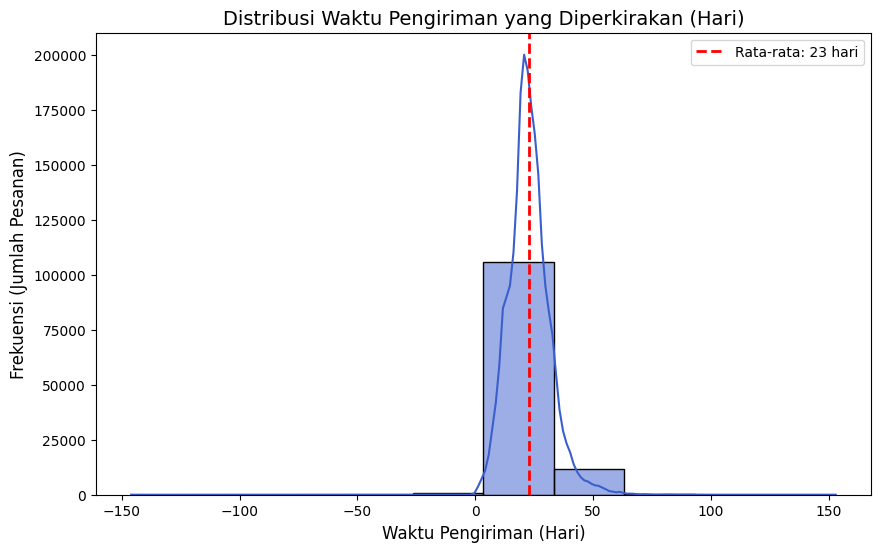

In [ ]:
# Create chart histogram rata-rata waktu pengiriman product

plt.figure(figsize=(10, 6))

sns.histplot(
    all_df['delivery_time'],
    bins=10,
    kde=True,
    color='#3A5FCD',
    edgecolor='black'
)
plt.title('Distribusi Waktu Pengiriman yang Diperkirakan (Hari)', fontsize=14)
plt.xlabel('Waktu Pengiriman (Hari)', fontsize=12)
plt.ylabel('Frekuensi (Jumlah Pesanan)', fontsize=12)
plt.axvline(orders_df['delivery_time'].mean(), color='red', linestyle='dashed', linewidth=2, label=f'Rata-rata: {orders_df["delivery_time"].mean():.0f} hari')
plt.legend()
plt.show()

### Pertanyaan 2: Berapa banyak pesanan tiba secara tepat waktu dan berapa banyak pesanan mengalami keterlambatan?

In [ ]:
# Jumlah order yang tiba 'On Time' dan 'Delay'

status_counts = orders_df['status_delivery'].value_counts().reset_index()
status_counts.columns = ['Status', 'Jumlah']
status_counts.head()

,Status,Jumlah
0,On Time,92906
1,Delay,6535


/tmp/ipython-input-4080784907.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


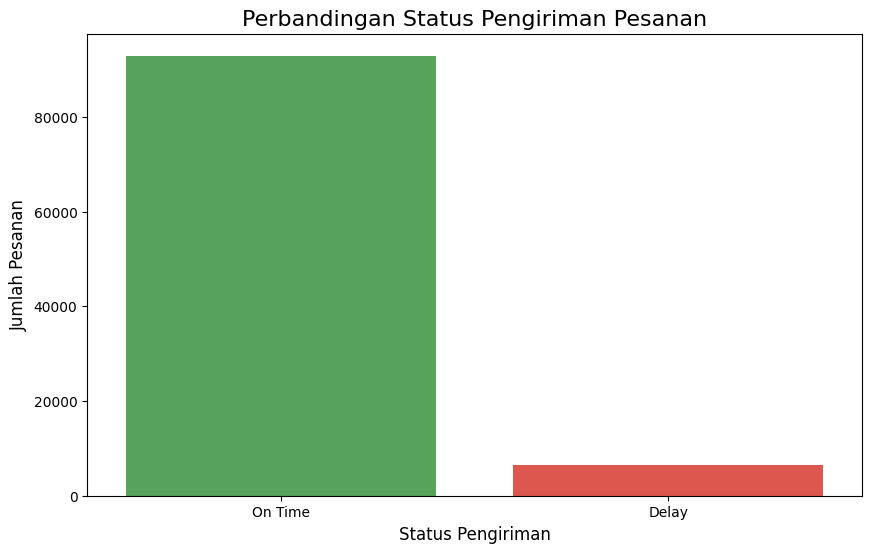

In [ ]:
# Create Bar Chart status_delivery

plt.figure(figsize=(10, 6))

sns.barplot(
    x='Status',
    y='Jumlah',
    data=status_counts,
    palette=['#4CAF50', '#F44336']
)

plt.title('Perbandingan Status Pengiriman Pesanan', fontsize=16)
plt.xlabel('Status Pengiriman', fontsize=12)
plt.ylabel('Jumlah Pesanan', fontsize=12)

plt.show()

### Pertanyaan 3: Kota manakah yang pesanannya paling banyak tiba secara 'On Time'?

In [ ]:
# Menampilkan top 5 kota yang jumlah pesanannya tiba tepat waktu ('On Time')

on_time_orders = orders_customers_df[orders_customers_df['status_delivery'] == 'On Time']
customer_city_performance = on_time_orders.groupby('customer_city').order_id.nunique().sort_values(ascending=False).reset_index().head(5)
customer_city_performance.columns = ['customer_city', 'total_on_time_orders']

customer_city_performance.head()


,customer_city,total_on_time_orders
0,sao paulo,14825
1,rio de janeiro,6176
2,belo horizonte,2636
3,brasilia,2013
4,curitiba,1462


/tmp/ipython-input-885878913.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


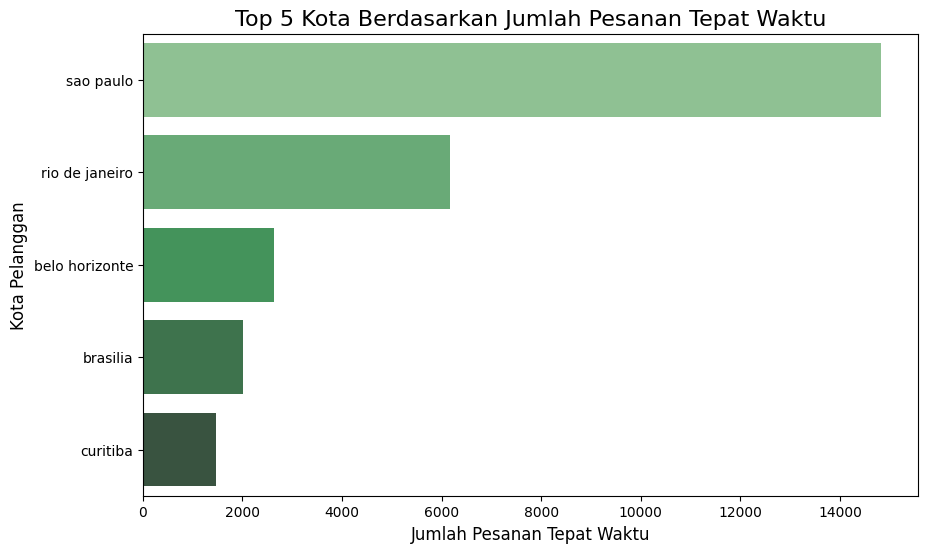

In [ ]:
# Create Bar Chart untuk menampilkan chart top 5 kota yang jumlah pesanannya tiba tepat waktu

plt.figure(figsize=(10, 6))

sns.barplot(
    x='total_on_time_orders',
    y='customer_city',
    data=customer_city_performance,
    palette='Greens_d',
)

plt.title('Top 5 Kota Berdasarkan Jumlah Pesanan Tepat Waktu', fontsize=16)
plt.xlabel('Jumlah Pesanan Tepat Waktu', fontsize=12)
plt.ylabel('Kota Pelanggan', fontsize=12)

plt.show()

### Pertanyaan 4: Kota manakah yang pesanannya paling banyak mengalami keterlambatan pengiriman?

In [ ]:
# Menampilkan top 5 kota yang jumlah pesanannya mengalami keterlambatan pengiriman ('Delay')

delay_delivery = orders_customers_df[orders_customers_df['status_delivery'] == 'Delay']
customer_city_delay = delay_delivery.groupby('customer_city').order_id.nunique().sort_values(ascending=False).reset_index().head(5)
customer_city_delay.columns = ['customer_city', 'total_delay_delivery_orders']

customer_city_delay.head()


,customer_city,total_delay_delivery_orders
0,sao paulo,715
1,rio de janeiro,706
2,salvador,174
3,belo horizonte,137
4,porto alegre,136


/tmp/ipython-input-1904977988.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


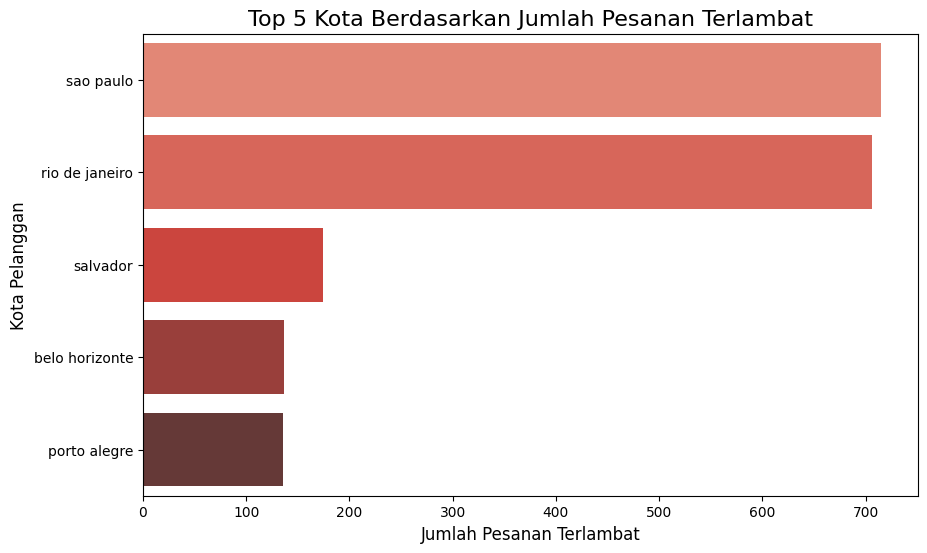

In [ ]:
# Create Bar Chart untuk menampilkan chart top 5 kota yang jumlah pesanannya mengalami keterlambatan pengiriman

plt.figure(figsize=(10, 6))

sns.barplot(
    x='total_delay_delivery_orders',
    y='customer_city',
    data=customer_city_delay,
    palette='Reds_d',
)

plt.title('Top 5 Kota Berdasarkan Jumlah Pesanan Terlambat', fontsize=16)
plt.xlabel('Jumlah Pesanan Terlambat', fontsize=12)
plt.ylabel('Kota Pelanggan', fontsize=12)

plt.show()

### Pertanyaan 5: Metode pembayaran apa yang sering digunakan pelanggan?

In [ ]:
order_payment = order_payment_customers.groupby('payment_type').customer_id.nunique().sort_values(ascending=False).reset_index()
order_payment.columns = ['payment_type', 'total_customer']
order_payment.head()

,payment_type,total_customer
0,credit_card,76505
1,boleto,19784
2,voucher,3866
3,debit_card,1528
4,not_defined,3


/tmp/ipython-input-4123717061.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


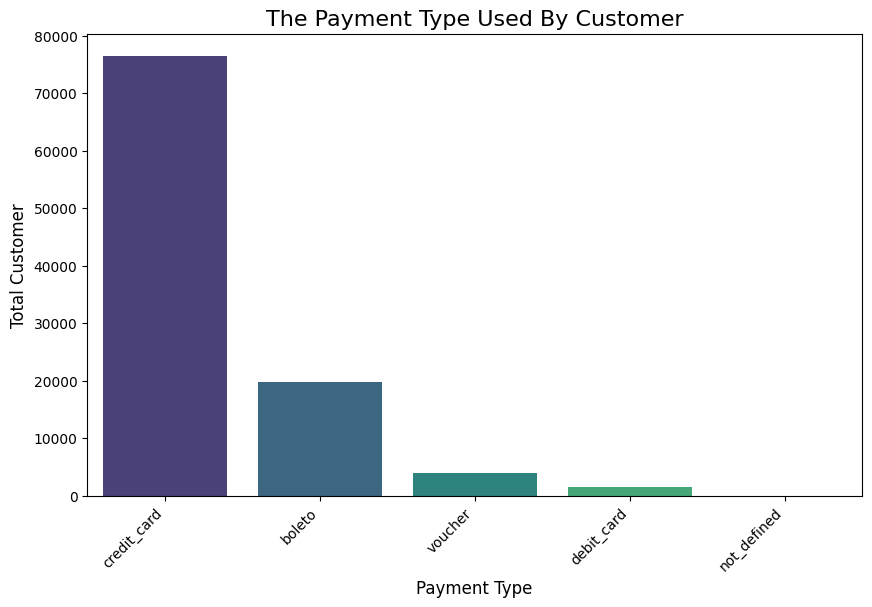

In [ ]:
# Create chart untuk menampilkan metode pembayaran yang sering digunakan oleh pelanggan

plt.figure(figsize=(10, 6))

sns.barplot(
    x='payment_type',
    y='total_customer',
    data=order_payment,
    palette='viridis'
)

plt.title('The Payment Type Used By Customer', fontsize=16)
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Total Customer', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.show()

### Pertanyaan 6: Product apa yang paling banyak dan paling sedikit dipesan?

In [ ]:
# Top 5 product yang paling banyak dipesan

category_product = order_items_products.groupby('product_category_name').order_item_id.sum()
top_category_product = category_product.sort_values(ascending=False).reset_index().head(5)
top_category_product.columns = ['product_category_name', 'total_order_item']

top_category_product.head()

,product_category_name,total_order_item
0,cama_mesa_banho,15543
1,moveis_decoracao,11540
2,beleza_saude,11081
3,esporte_lazer,9932
4,informatica_acessorios,9874


In [ ]:
# Top 5 product yang paling sedikit dipesan

bottom_category_product = category_product.sort_values(ascending=True).reset_index().head(5)
bottom_category_product.columns = ['product_category_name', 'total_order_item']

bottom_category_product.head(5)

,product_category_name,total_order_item
0,seguros_e_servicos,2
1,fashion_roupa_infanto_juvenil,8
2,pc_gamer,11
3,cds_dvds_musicais,16
4,portateis_cozinha_e_preparadores_de_alimentos,16


/tmp/ipython-input-3543829702.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3543829702.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


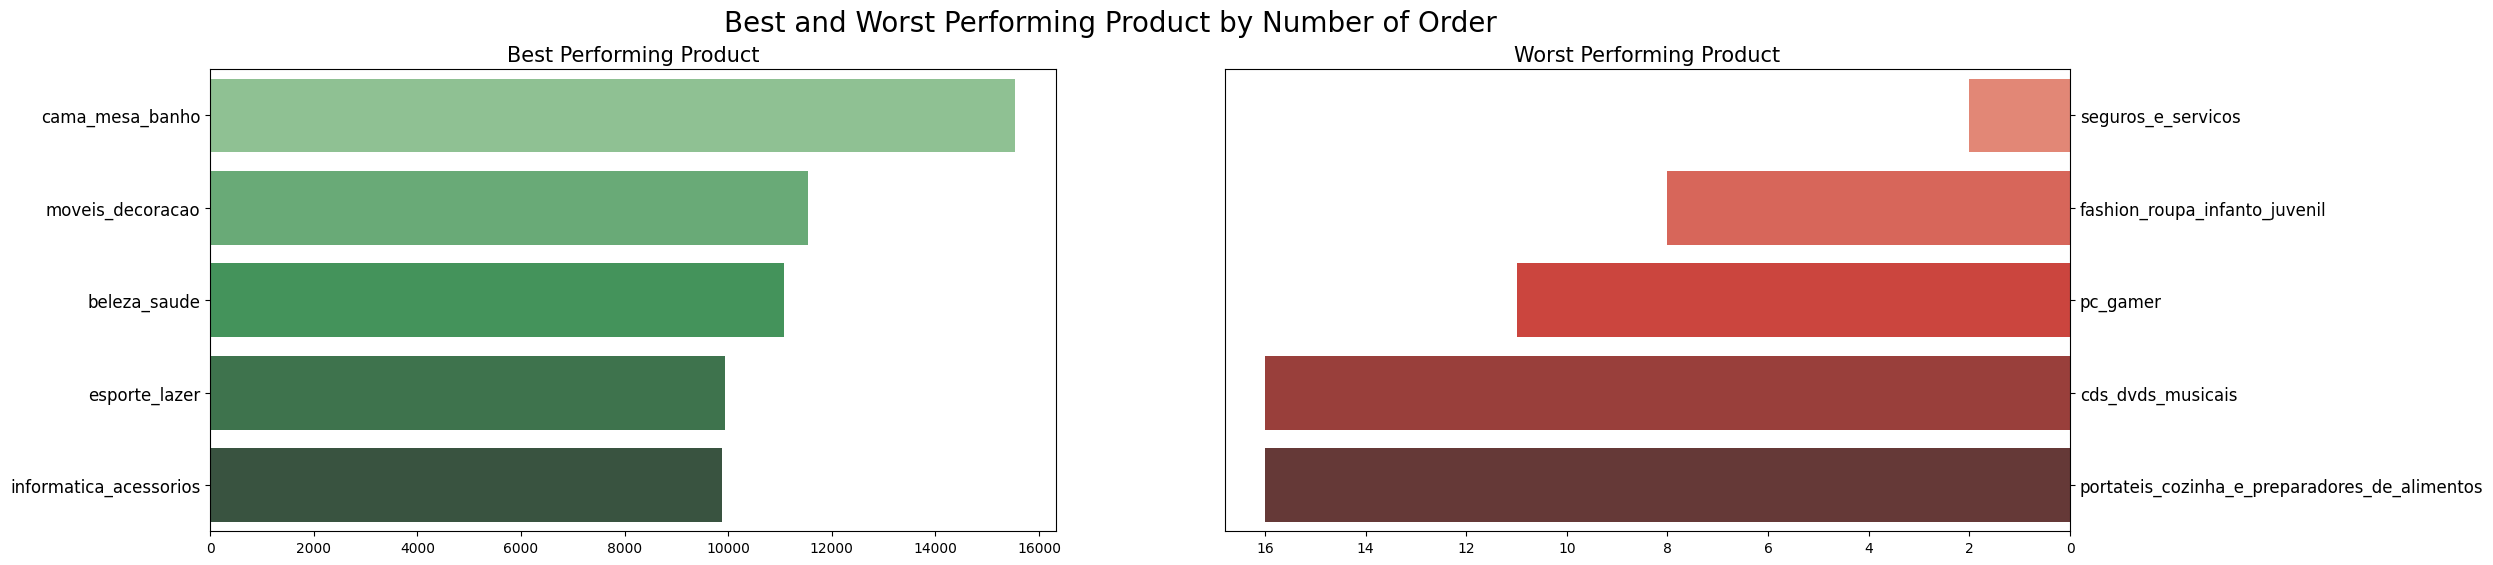

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Chart best performing product

sns.barplot(
    x='total_order_item',
    y='product_category_name',
    data=top_category_product,
    palette='Greens_d',
    ax=ax[0]
)
ax[0].set_title('Best Performing Product', fontsize=15)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].tick_params(axis='y', labelsize=12)

# Chart worst performing product

sns.barplot(
    x='total_order_item',
    y='product_category_name',
    data=bottom_category_product,
    palette='Reds_d',
)
ax[1].set_title('Worst Performing Product', fontsize=15)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].tick_params(axis='y', labelsize=12)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()

plt.suptitle("Best and Worst Performing Product by Number of Order", fontsize=20)
plt.show()

### Pertanyaan 7: Product apa yang memiliki harga tertinggi dan terendah?

In [ ]:
# Top 5 product yang memiliki harga tertinggi

high_price = order_items_products.groupby('product_category_name').price.max().sort_values(ascending=False).reset_index().head(5)
high_price.columns = ['product', 'price']

high_price.head()

,product,price
0,utilidades_domesticas,6735.00
1,pcs,6729.00
2,artes,6499.00
3,eletroportateis,4799.00
4,instrumentos_musicais,4399.87


In [ ]:
# Top 5 product yang memiliki harga terendah

low_price = order_items_products.groupby('product_category_name').price.min().sort_values(ascending=True).reset_index().head(5)
low_price.columns = ['product', 'price']

low_price.head()

,product,price
0,construcao_ferramentas_construcao,0.85
1,beleza_saude,1.20
2,papelaria,2.29
3,pet_shop,2.90
4,cama_mesa_banho,3.00


/tmp/ipython-input-2067893409.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2067893409.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


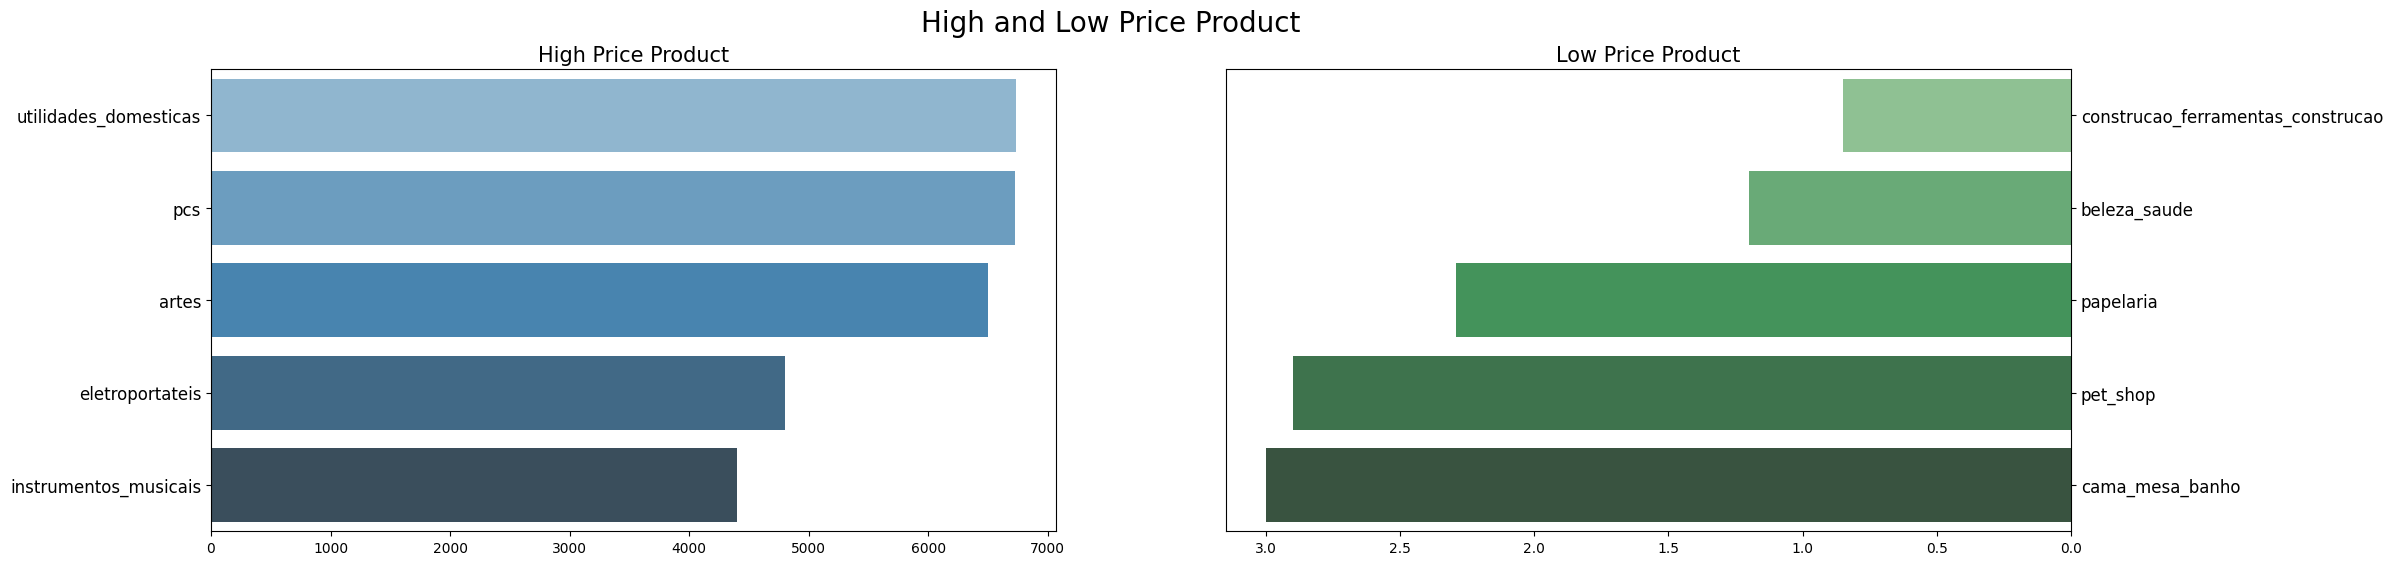

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Chart high price product

sns.barplot(
    x='price',
    y='product',
    data=high_price,
    palette='Blues_d',
    ax=ax[0]
)
ax[0].set_title('High Price Product', fontsize=15)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].tick_params(axis='y', labelsize=12)

# Chart low product

sns.barplot(
    x='price',
    y='product',
    data=low_price,
    palette='Greens_d',
)
ax[1].set_title('Low Price Product', fontsize=15)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].tick_params(axis='y', labelsize=12)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()

plt.suptitle("High and Low Price Product", fontsize=20)
plt.show()

### Pertanyaan 8: Bagaimana performa penjualan dan revenue dalam beberapa tahun terakhir

In [ ]:
# Revenue dalam beberapa tahun terakhir

yearly_performance.head()

,year,total_order,revenue
0,2016,327,51085.52
1,2017,45045,6475657.60
2,2018,54068,7682372.22


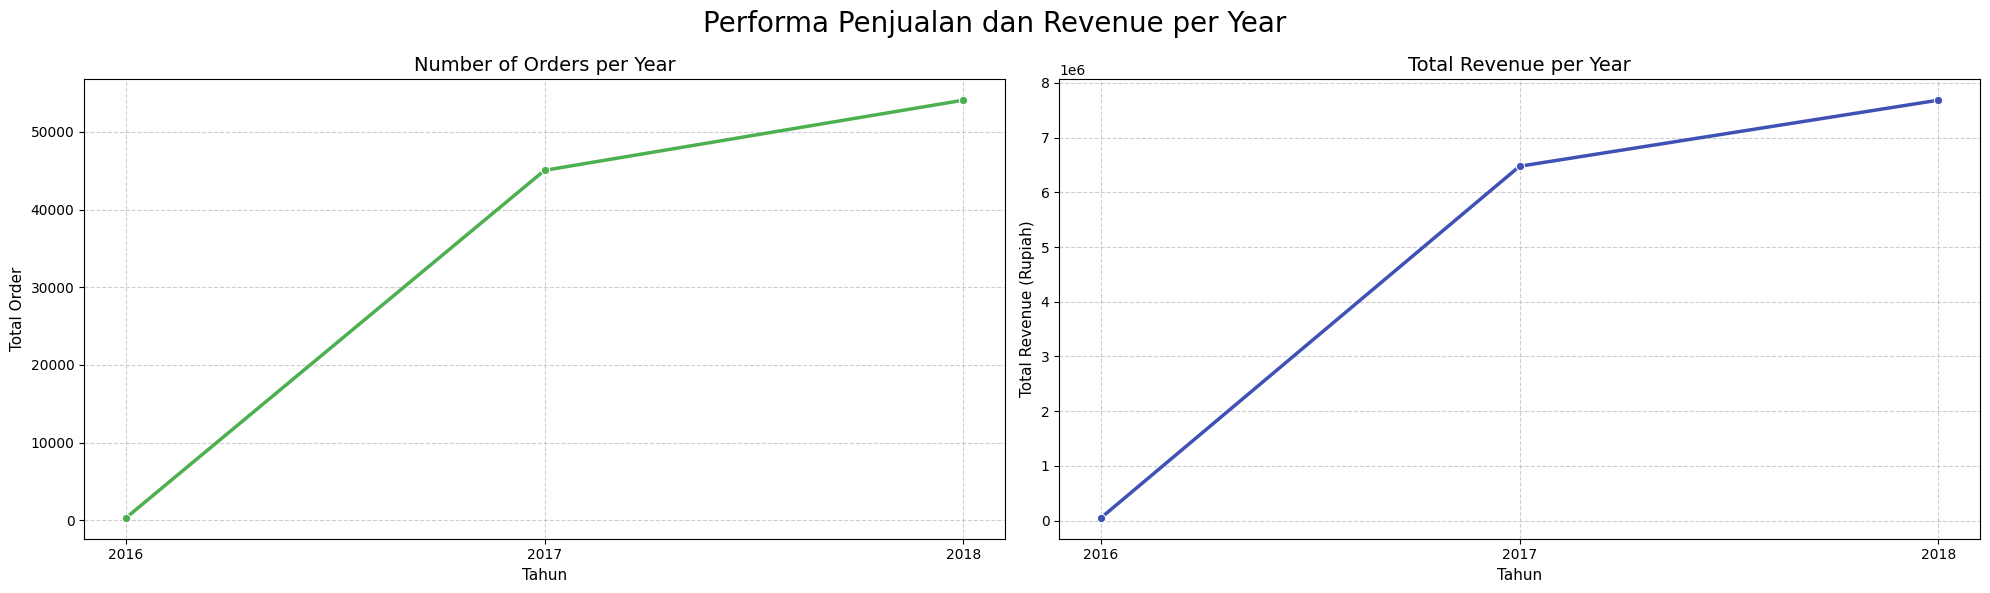

In [ ]:
plt.figure(figsize=(20, 6))

# Jumlah total order per tahun

plt.subplot(1, 2, 1)

sns.lineplot(
    x='year',
    y='total_order',
    data=yearly_performance,
    marker='o',
    color='#4CAF50',
    linewidth=2.5
)
plt.title('Number of Orders per Year', fontsize=14)
plt.xlabel('Tahun', fontsize=11)
plt.ylabel('Total Order', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(yearly_performance['year'])

# Jumlah total revenue per tahun

plt.subplot(1, 2, 2)

sns.lineplot(
    x='year',
    y='revenue',
    data=yearly_performance,
    marker='o',
    color='#3F51B5',
    linewidth=2.5
)
plt.title('Total Revenue per Year', fontsize=14)
plt.xlabel('Tahun', fontsize=11)
plt.ylabel('Total Revenue (Rupiah)', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(yearly_performance['year'])

plt.suptitle("Performa Penjualan dan Revenue per Year", fontsize=20)

plt.tight_layout()
plt.show()

In [ ]:
all_df.to_csv('all_data.csv', index=False)

**Insight:**
- Rata-rata waktu pengiriman masih tergolong lama yaitu memakan waktu sekitar 23 hari.
- Jumlah total order tiba On Time terbanyak di sao paulo dan jumlah total order mengalami keterlambatan juga terbanyak di sao paulo
- Metode pembayaran yang masih sering digunakan oleh pelanggan adalah credit_card
- Product yang paling banyak di order adalah cama_mesa_banho dengan total jumlah order item sebanyak 15543 dan productpaling sedikit di order adalah seguros_e_servicos yaitu hanya dipesan sebanyak 2 item
- Product dengan harga tertinggi adalah utilidades_domesticas dan product dengan harga terendah adalah construcao_ferramentas_construcao
- Revenue yang didapat dari tahun 2016-2018 selalu mengalami peningkatan

## Analisis Lanjutan (Opsional)

### RFM Analysis
- Kapan terakhir pelanggan melakukan transaksi?
- Seberapa sering seorang pelanggan melakukan pembelian?
- Berapa banyak revenue yang telah didapat?

In [ ]:
rfm_df = all_df.groupby(by='customer_id', as_index=False).agg({
    'order_purchase_timestamp' : 'max',
    'order_id' : 'nunique',
    'price' : 'sum'
})

rfm_df.columns = ['customer_id', 'max_order_timestamp', 'frequency', 'monetary']

# Menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df['max_order_timestamp'] = rfm_df['max_order_timestamp'].dt.date
recent_date = all_df['order_purchase_timestamp'].dt.date.max()
rfm_df['recency'] = rfm_df['max_order_timestamp'].apply(lambda x: (recent_date - x).days)

rfm_df.drop('max_order_timestamp', axis=1, inplace=True)

rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,337
1,000161a058600d5901f007fab4c27140,1,54.90,458
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,596
3,0002414f95344307404f0ace7a26f1d5,1,149.90,427
4,000379cdec625522490c315e70c7a9fb,1,93.00,198


/tmp/ipython-input-4286489001.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
/tmp/ipython-input-4286489001.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
/tmp/ipython-input-4286489001.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(b

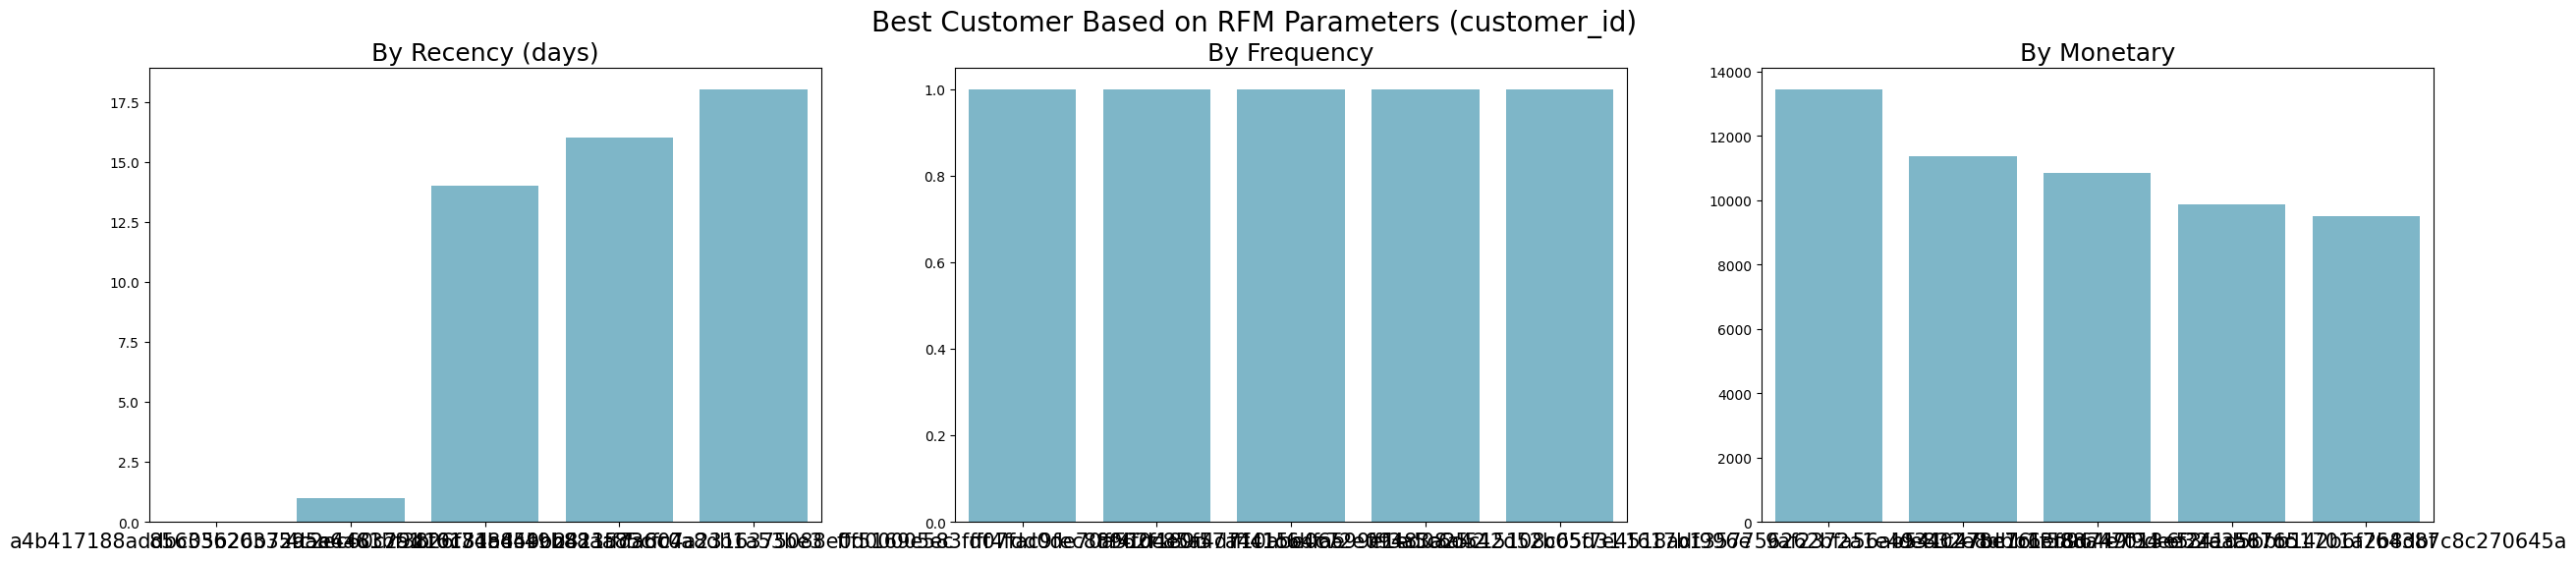

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

### Geospatial Analysis


In [ ]:
# Menggabungkan data customer_df dengan geolocation_df

geolocation_customers = pd.merge(
    left = customer_df,
    right = geolocation_df,
    how = 'left',
    left_on = 'customer_zip_code_prefix',
    right_on = 'geolocation_zip_code_prefix'
)

geolocation_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.509897,-47.397866,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.515413,-47.398194,franca,SP


In [ ]:
# Create GeoDataFrame

gdf = gpd.GeoDataFrame(
    geolocation_customers,
    geometry=gpd.points_from_xy(
        geolocation_customers['geolocation_lng'],
        geolocation_customers['geolocation_lat']
    ),
    crs="EPSG:4326"
)

gdf.head()



,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,geometry
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.509897,-47.397866,franca,SP,POINT (-47.39787 -20.5099)
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.497396,-47.399241,franca,SP,POINT (-47.39924 -20.4974)
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.510459,-47.399553,franca,SP,POINT (-47.39955 -20.51046)
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.480940,-47.394161,franca,SP,POINT (-47.39416 -20.48094)
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.515413,-47.398194,franca,SP,POINT (-47.39819 -20.51541)


In [ ]:
# Menampilkan jumlah pelanggan paling sedikit berdasarkan customer_state

total_customer_state = gdf.groupby('customer_state').customer_id.nunique().sort_values(ascending=True).reset_index().head(5)
total_customer_state.head()

,customer_state,customer_id
0,RR,46
1,AP,68
2,AC,81
3,AM,148
4,RO,253


In [ ]:
# Membuat map yang jumlah pelanggan paling sedikit berdasarkan customer_state

gdf_rr = gdf[gdf['customer_state'] == 'RR']

lat_rr_center = gdf_rr['geolocation_lat'].iloc[0]
lng_rr_center = gdf_rr['geolocation_lng'].iloc[0]
map_center = [lat_rr_center, lng_rr_center]

m = folium.Map(location=map_center, zoom_start=10, tiles="cartodbpositron")

folium.GeoJson(gdf_rr).add_to(m)

m

### Clustering

#### Segmentasi Customer berdasarkan RFM_Score

In [ ]:
# Mengurutkan customer berdasarkan recency, frequency, & monetary score

rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df


,customer_id,frequency,monetary,recency,r_rank,f_rank,m_rank
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,337,34363.5,49720.5,50348.0
1,000161a058600d5901f007fab4c27140,1,54.90,458,16870.5,49720.5,31389.0
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,596,2881.0,49720.5,80042.5
3,0002414f95344307404f0ace7a26f1d5,1,149.90,427,21180.5,49720.5,73488.5
4,000379cdec625522490c315e70c7a9fb,1,93.00,198,66985.5,49720.5,52758.5
...,...,...,...,...,...,...,...
99435,fffecc9f79fd8c764f843e9951b11341,1,164.70,202,66207.5,49720.5,76724.0
99436,fffeda5b6d849fbd39689bb92087f431,1,47.90,148,79236.0,49720.5,25678.5
99437,ffff42319e9b2d713724ae527742af25,1,199.90,126,83075.0,49720.5,83083.5
99438,ffffa3172527f765de70084a7e53aae8,1,21.80,410,23506.5,49720.5,7513.0


In [ ]:
# normalizing the rank of the customers

rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100

rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)

rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,337,34.557019,100.0,50.631537
1,000161a058600d5901f007fab4c27140,1,54.90,458,16.965507,100.0,31.565768
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,596,2.897224,100.0,80.493262
3,0002414f95344307404f0ace7a26f1d5,1,149.90,427,21.299779,100.0,73.902353
4,000379cdec625522490c315e70c7a9fb,1,93.00,198,67.362731,100.0,53.055611


In [ ]:
# Create RFM_score

rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['customer_id', 'RFM_score']].head(7)

,customer_id,RFM_score
0,00012a2ce6f8dcda20d059ce98491703,3.10
1,000161a058600d5901f007fab4c27140,2.43
2,0001fd6190edaaf884bcaf3d49edf079,3.72
3,0002414f95344307404f0ace7a26f1d5,3.67
4,000379cdec625522490c315e70c7a9fb,3.42
5,0004164d20a9e969af783496f3408652,2.50
6,000419c5494106c306a97b5635748086,2.33


In [ ]:
# Segmentasi customer berdasarkan RFM_score

rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm_df[['customer_id', 'RFM_score', 'customer_segment']].head(20)

,customer_id,RFM_score,customer_segment
0,00012a2ce6f8dcda20d059ce98491703,3.10,Medium value customer
1,000161a058600d5901f007fab4c27140,2.43,Low value customers
2,0001fd6190edaaf884bcaf3d49edf079,3.72,Medium value customer
3,0002414f95344307404f0ace7a26f1d5,3.67,Medium value customer
4,000379cdec625522490c315e70c7a9fb,3.42,Medium value customer
5,0004164d20a9e969af783496f3408652,2.50,Low value customers
6,000419c5494106c306a97b5635748086,2.33,Low value customers
7,00046a560d407e99b969756e0b10f282,3.60,Medium value customer
8,00050bf6e01e69d5c0fd612f1bcfb69c,2.80,Low value customers
9,000598caf2ef4117407665ac33275130,4.95,Top customers


In [ ]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).customer_id.nunique()
customer_segment_df

,customer_segment,customer_id
0,High value customer,16204
1,Low value customers,41643
2,Medium value customer,34865
3,Top customers,5516
4,lost customers,1212


In [ ]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

/tmp/ipython-input-2998268266.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


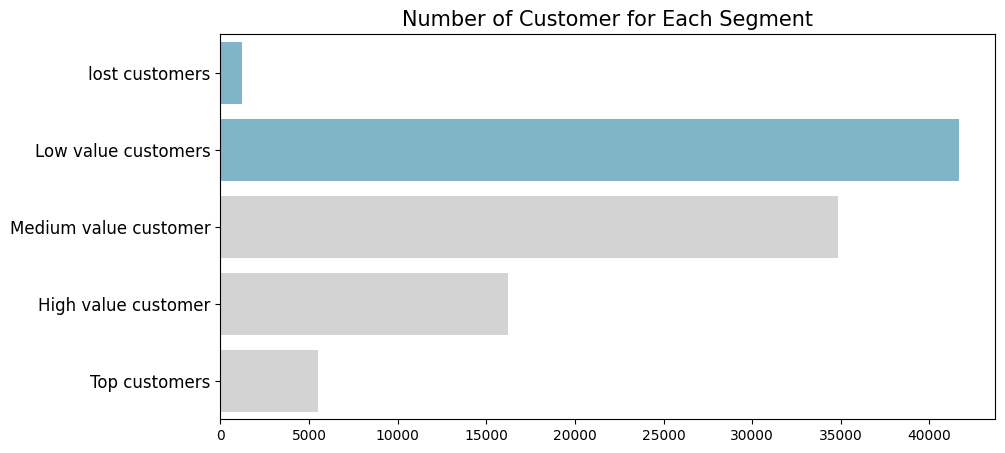

In [ ]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_id",
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors_
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

#### Binning Customer

In [ ]:
# Binning customer berdasarkan RFM_score

kategori = ['lost customers', 'Low value customers', 'Medium value customer', 'High value customer', 'Top customers']

rfm_df['customer_bining'] = pd.qcut(
    rfm_df['RFM_score'],
    q=5,
    labels=kategori,
    duplicates='drop'
)

rfm_df[['customer_id', 'RFM_score', 'customer_bining']].head(10)

,customer_id,RFM_score,customer_bining
0,00012a2ce6f8dcda20d059ce98491703,3.10,Medium value customer
1,000161a058600d5901f007fab4c27140,2.43,Low value customers
2,0001fd6190edaaf884bcaf3d49edf079,3.72,High value customer
3,0002414f95344307404f0ace7a26f1d5,3.67,High value customer
4,000379cdec625522490c315e70c7a9fb,3.42,Medium value customer
5,0004164d20a9e969af783496f3408652,2.50,Low value customers
6,000419c5494106c306a97b5635748086,2.33,lost customers
7,00046a560d407e99b969756e0b10f282,3.60,High value customer
8,00050bf6e01e69d5c0fd612f1bcfb69c,2.80,Low value customers
9,000598caf2ef4117407665ac33275130,4.95,Top customers


In [ ]:
customer_binning_df = rfm_df.groupby(by="customer_bining", as_index=False).customer_id.nunique()
customer_binning_df

/tmp/ipython-input-1074201655.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_binning_df = rfm_df.groupby(by="customer_bining", as_index=False).customer_id.nunique()


,customer_bining,customer_id
0,lost customers,20012
1,Low value customers,20056
2,Medium value customer,19748
3,High value customer,19777
4,Top customers,19847


/tmp/ipython-input-2913268213.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


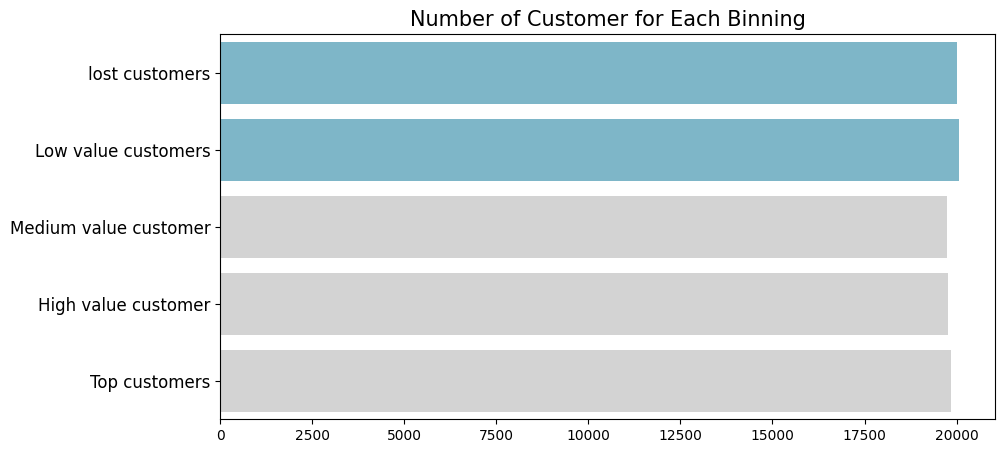

In [ ]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_id",
    y="customer_bining",
    data=customer_binning_df.sort_values(by="customer_bining", ascending=False),
    palette=colors_
)
plt.title("Number of Customer for Each Binning", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Waktu rata-rata yang dibutuhkan untuk pengiriman adalah 23 hari
- Conclution pertanyaan 2 : Pesanan tiba secara On Time sebanyak 92906 dan pesanan yang mengalami Delay sebanyak 6535
- Conclution pertanyaan 3 : Kota yang pesanannya paling banyak tiba On Time adalah sao paulo. Dengan jumlah pesanan sebesar 14825 tiba secara On Time di sao paulo
- Conclution pertanyaan 4 : Kota yang pesanannya paling banyak mengalami Delay pengiriman adalah sao paulo. Jumlah pesanan yang mengalami Delay pengiriman sebanyak 715
- Conclution pertanyaan 5 : Metode pembayaran yang sering digunakan oleh pelanggan adalah credit_card. Sebanyak 76505 pelanggan menggunakan credit_card sebagai metode pembayaran.
- Conclution pertanyaan 6 : Product yang banyak dipesan adalah cama_mesa_banho dengan jumlah pesanan sebanyak 15543. Product yang paling sedikit dipesan adalah seguros_e_servicos dengan jumlah pesanan sebanyak 2.
- Conclution pertanyaan 7 : Product utilidades_domesticas merupakan harga tertinggi dengan harga mencapai 6735.00. Sedangkan product dengan harga terendah adalah construcao_ferramentas_construcao dengan harga 0.85.
- Conclution pertanyaan 8 : Performa penjualan dari tahun 2016-2018 selalu mengalami peningkatan yaitu dari 327 sampai 54068. Begitu pun dengan revenue yang didapat selalu mengalami peningkatan yaitu dari 51085.52 sampai 7682372.22